In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def displayBGR(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

def displayGray(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))

In [3]:
img = cv2.imread('./car.png')

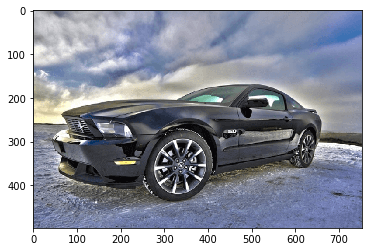

In [4]:
displayBGR(img)

## Rotate an Image

In [5]:
height, width = img.shape[0:2]

In [6]:
rotationMatrix = cv2.getRotationMatrix2D((width/2, height/2), 90, .5)

In [7]:
rotatedImage = cv2.warpAffine(img, rotationMatrix, (width, height))

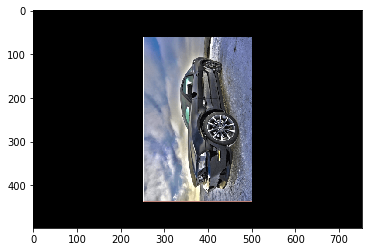

In [8]:
displayBGR(rotatedImage)

# Crop an Image

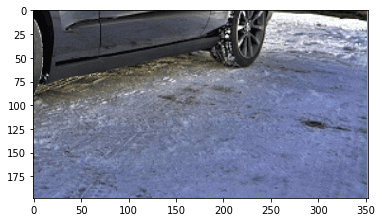

In [9]:
displayBGR(img[300:height, 400:width])

## Resize an Image

In [10]:
newImg = cv2.resize(img, (200, 200))

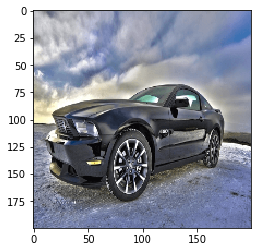

In [11]:
displayBGR(newImg)

## Adjust Image Contrast

In [12]:
contrastImg = cv2.addWeighted(img, 2.5, np.zeros(img.shape, img.dtype), 0, 0)

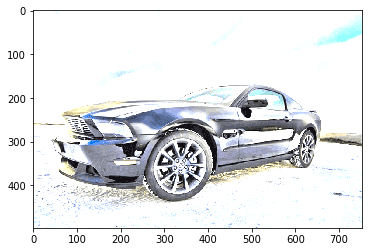

In [13]:
displayBGR(contrastImg)

## Make an image blurry

### Gaussian Blur

In [14]:
blurImg = cv2.GaussianBlur(img, (7, 7), 0)

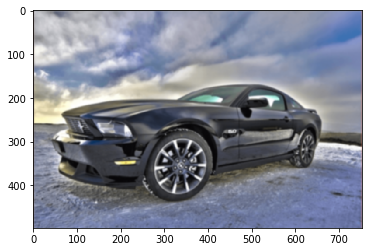

In [15]:
displayBGR(blurImg)

### Median Blur

In [16]:
blurImg = cv2.medianBlur(img, 5)

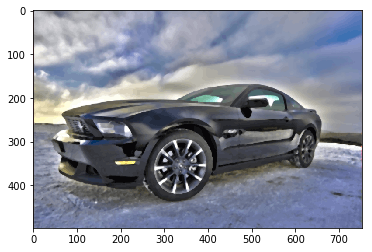

In [17]:
displayBGR(blurImg)

## Detect Edges

In [18]:
# http://monkeycoding.com/?p=622
cannyImg = cv2.Canny(img, 100, 200)

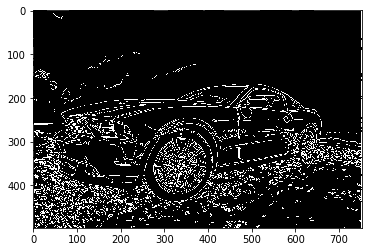

In [19]:
displayGray(cannyImg)

## Convert image to grayscale

In [20]:
# https://blog.csdn.net/qq_32211827/article/details/56854985
grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

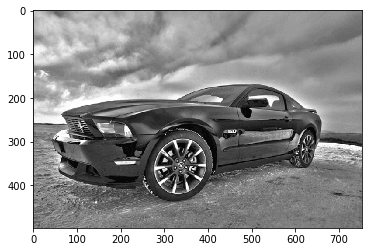

In [21]:
displayGray(grayImg)

## Centroid (Center of blob) detection

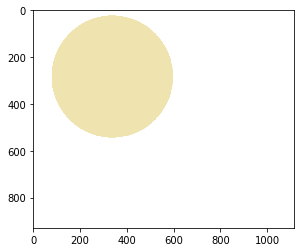

In [22]:
circleImg = cv2.imread('./circle.png')
displayBGR(circleImg)

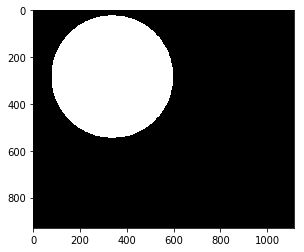

In [23]:
grayImg = cv2.cvtColor(circleImg, cv2.COLOR_BGR2GRAY)
retval, thresh = cv2.threshold(grayImg, 254, 255, cv2.THRESH_BINARY_INV)
displayGray(thresh)

In [24]:
# https://www.cnblogs.com/mikewolf2002/p/3427564.html
moment = cv2.moments(thresh)

In [25]:
x = int(moment["m10"] / moment["m00"])
y = int(moment["m01"] / moment["m00"])

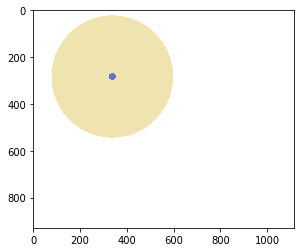

In [26]:
cv2.circle(circleImg, (x, y), 15, (205, 114, 101), -1)
displayBGR(circleImg)

## Apply a mask on the circles

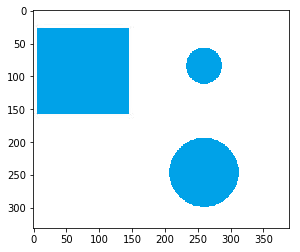

In [27]:
shapesImg = cv2.imread('./shapes.png')
displayBGR(shapesImg)

In [28]:
grayImg = cv2.cvtColor(shapesImg, cv2.COLOR_BGR2GRAY)
circles = cv2.HoughCircles(grayImg, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=20, minRadius=0, maxRadius=0)
circles

array([[[258.5,  83.5,  27.1],
        [262.5, 249.5,  48.1]]], dtype=float32)

In [29]:
for circle in circles[0]:
    cv2.circle(shapesImg, tuple(circle[0:2]), circle[2], (255,255,0), 8)

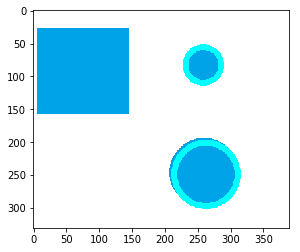

In [30]:
displayBGR(shapesImg)

In [31]:
masking = np.zeros(shapesImg.shape[0:2], dtype=shapesImg.dtype)

In [32]:
for circle in circles[0]:
    cv2.circle(masking, tuple(circle[0:2]), circle[2], (255,255,255), -1)

In [33]:
maskedImg = cv2.bitwise_or(shapesImg, shapesImg, mask=masking)

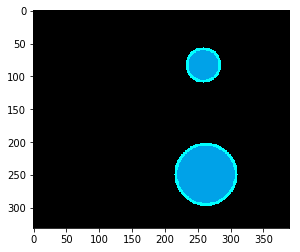

In [34]:
displayBGR(maskedImg)

## Detect and correct text skew

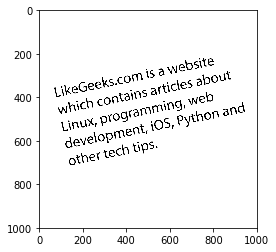

In [35]:
skewedText = cv2.imread('./skewed-text-image.png')
displayBGR(skewedText)

In [36]:
grayImg = cv2.cvtColor(skewedText, cv2.COLOR_BGR2GRAY)
grayImg

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [37]:
grayImg = cv2.bitwise_not(grayImg)
grayImg

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [38]:
coordinates = np.column_stack(np.where(grayImg == 255))

In [39]:
# https://blog.csdn.net/lanyuelvyun/article/details/76614872
ang = cv2.minAreaRect(coordinates)[-1]

In [40]:
if ang < -45:
    ang = -(90+ang)
else:
    ang = -ang

In [41]:
height, width = skewedText.shape[0:2]
centerImg = (width / 2, height / 2)

In [42]:
rotationMatrix = cv2.getRotationMatrix2D(centerImg, ang, 1)

In [43]:
rotatedImg = cv2.warpAffine(skewedText, rotationMatrix, (width, height), borderMode=cv2.BORDER_REFLECT)

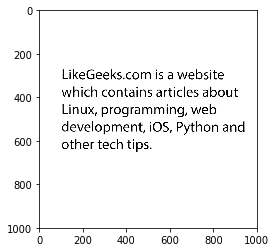

In [44]:
displayBGR(rotatedImg)

## Color Detection

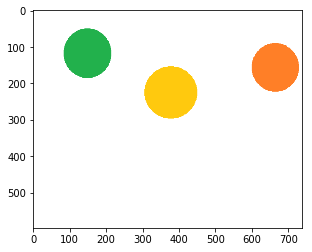

In [45]:
colorCircles = cv2.imread('./color_circles.png')
displayBGR(colorCircles)

In [46]:
# http://vincecc.blogspot.com/2013/09/opencv-extract-colors-hsv.html
lower_green = np.array([50,100,120])
upper_green = np.array([70,255,255])
hsvImg = cv2.cvtColor(colorCircles, cv2.COLOR_BGR2HSV)
masking = cv2.inRange(hsvImg, lower_green, upper_green)

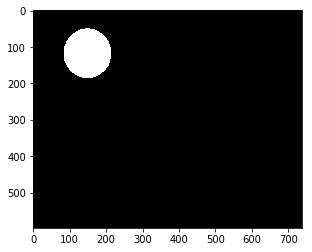

In [47]:
displayGray(masking)

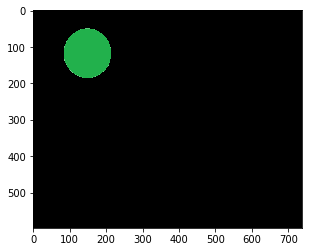

In [48]:
displayBGR(cv2.bitwise_or(colorCircles, colorCircles, mask=masking))

## Reduce Noise

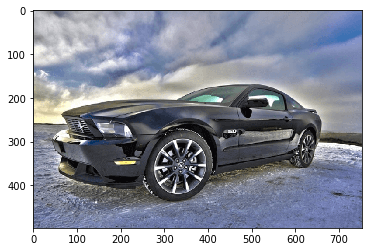

In [49]:
displayBGR(img)

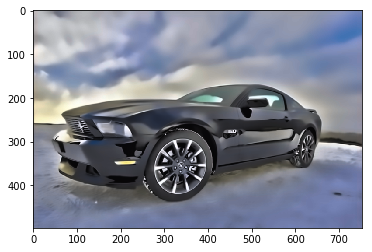

In [50]:
# https://www.jianshu.com/p/26e29adf7429
denoisedImg = cv2.fastNlMeansDenoisingColored(img,None,20,10,7,21)
displayBGR(denoisedImg)

## Get image contour

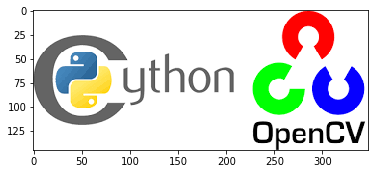

In [51]:
opencvImg = cv2.imread('./Image-with-shapes.png')
displayBGR(opencvImg)

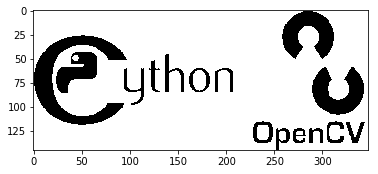

In [52]:
grayImg = cv2.cvtColor(opencvImg, cv2.COLOR_BGR2GRAY)
retval, thresh = cv2.threshold(grayImg, 127, 255, cv2.THRESH_BINARY)
displayGray(thresh)

In [53]:
# https://blog.csdn.net/sunny2038/article/details/12889059
imgContours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

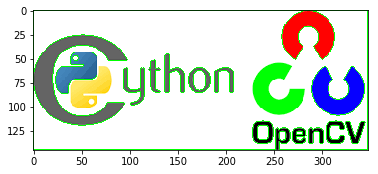

In [54]:
# 第三個參數 contourIdx 指明畫第幾個輪廓，如果該參數為負值，則畫全部輪廓
cv2.drawContours(opencvImg, imgContours, -1, (0, 255, 0))
displayBGR(opencvImg)

## Remove Background from an image

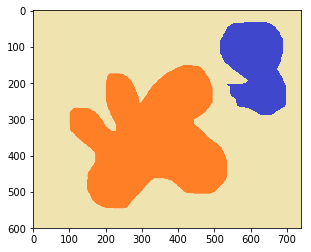

In [55]:
removeBackground = cv2.imread('./remove-background.png')
displayBGR(removeBackground)

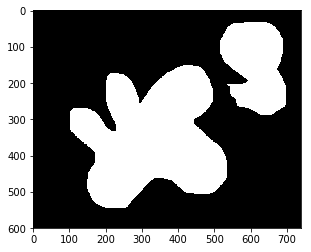

In [56]:
grayImg = cv2.cvtColor(removeBackground, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(grayImg, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
displayGray(thresh)

In [57]:
imgContours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [58]:
[cv2.contourArea(imgContour) for imgContour in imgContours]

[108302.0, 34820.0]

In [59]:
mask = np.zeros(thresh.shape, thresh.dtype)
filteredImgContours = [imgContour for imgContour in imgContours if cv2.contourArea(imgContour) > 50000]
cv2.drawContours(mask, filteredImgContours, -1, 255, cv2.FILLED)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

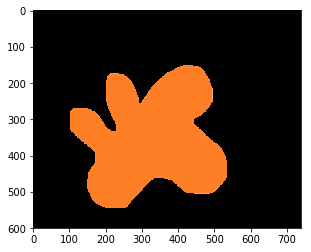

In [60]:
displayBGR(cv2.bitwise_and(removeBackground, removeBackground, mask=mask))

## Use ROI to superimpose image

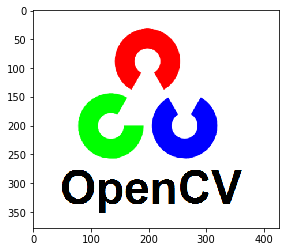

In [61]:
background = cv2.imread('./car.png')
opencv = cv2.imread('./opencv.png')
displayBGR(opencv)

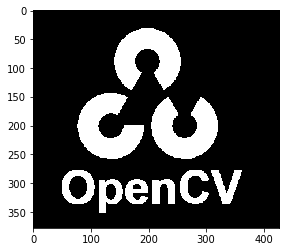

In [62]:
grayImg = cv2.cvtColor(opencv, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(grayImg, 254, 255, cv2.THRESH_BINARY_INV)
maskInv = cv2.bitwise_not(mask)
displayGray(mask)

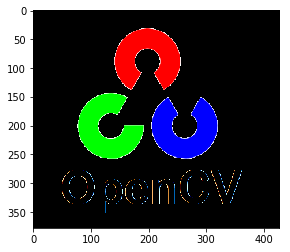

In [63]:
fg = cv2.bitwise_and(opencv, opencv, mask=mask)
displayBGR(fg)

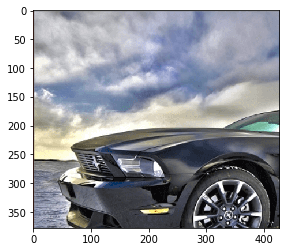

In [64]:
height, width, channels = opencv.shape
roi = background[0:height, 0:width]
displayBGR(roi)

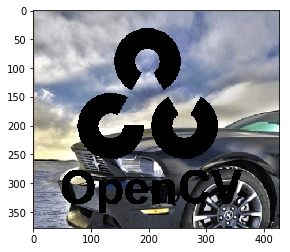

In [65]:
bg = cv2.bitwise_and(roi, roi, mask=maskInv)
displayBGR(bg)

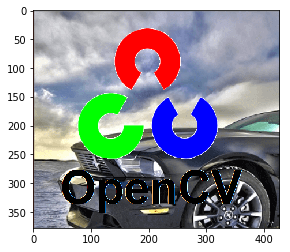

In [66]:
dst = cv2.add(fg, bg)
displayBGR(dst)

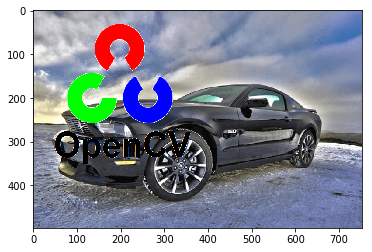

In [67]:
background[0:height, 0:width] = dst
displayBGR(background)